<a href="https://colab.research.google.com/github/dhruvbhavsar0612/exploratory-data-analysis/blob/main/sentiment_analysis_amazon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nltk

## Reading data and NLTK basics

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [8]:
df = pd.read_csv('Reviews.csv')

In [9]:
df.shape

(6263, 10)

In [10]:
df = df.head(600)
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
595,596,B000G6RYNE,A216YA3CYXIOGI,lady in the south,1,1,5,1280620800,GREAT TASTING CHIPS,This is the second purchase of Kettle Potato C...
596,597,B000G6RYNE,A20FQULBVVWA8B,"L. Ljunghammar ""Eclectic Scout""",1,1,5,1266796800,"Buy These, Eat These, Be Happy!",How to achieve potato chip nirvana? It's simpl...
597,598,B000G6RYNE,A1LFB8KRBI9IE2,"Kenneth Holmes ""flippper60""",1,1,5,1257206400,Eating them for years.,I found these more than 10 years ago in a heal...
598,599,B000G6RYNE,A2N10M1J3KJZK4,MT_Soul,1,1,5,1249084800,These chips will make you fat,But you will enjoy ever step. I gained 5 lbs w...


In [11]:
text = df['Text']

In [12]:
text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

## Quick EDA

In [13]:
df['Score'].head(10)

0    5
1    1
2    4
3    2
4    5
5    4
6    5
7    5
8    5
9    5
Name: Score, dtype: int64

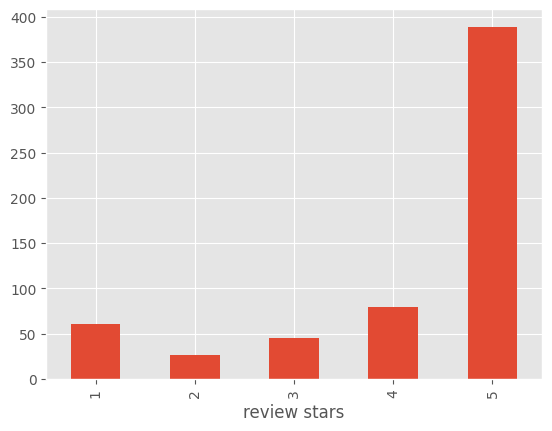

In [14]:
axes = df['Score'].value_counts().sort_index().plot(kind='bar')

axes.set_xlabel('review stars')
plt.show()

## NLTK

In [15]:
example= text[50]
example

"This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go."

In [19]:
# this looks like a negative review
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

In [34]:
nltk.download('words')

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [30]:
tagged = nltk.pos_tag(tokens) #part of speech tags for each token
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

## what each POS tag means ?
- CC: It is the conjunction of coordinating
- CD: It is a digit of cardinal
- DT: It is the determiner
- EX: Existential
- FW: It is a foreign word
- IN: Preposition and conjunction
- JJ: Adjective
- JJR and JJS: Adjective and superlative
- LS: List marker
- MD: Modal
- NN: Singular noun
- NNS, NNP, NNPS: Proper and plural noun
- PDT: Predeterminer
- WRB: Adverb of wh
- WPdollar: Possessive wh
- WP: Pronoun of wh
- WDT: Determiner of wp
- VBZ: Verb
- VBP, VBN, VBG, VBD, VB: Forms of verbs
- UH: Interjection
- TO: To go
- RP: Particle
- RBS, RB, RBR: Adverb
- PRP, PRPdollar: Pronoun personal and professional

In [35]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## VADER
Valence aware dictionary and sentiment reasoner (BOW approach)

This uses bag of words approach:
- Stop words are removed
- Each word is scored and combined to a total score

In [37]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

SIA=SentimentIntensityAnalyzer()

In [39]:
print(SIA.polarity_scores("I am so happy !"))
print(SIA.polarity_scores("I am a little happy now!"))
print(SIA.polarity_scores("I am so not happy !"))
print(SIA.polarity_scores("I am just a little sad!"))
print(SIA.polarity_scores("I am okayish !"))
print(SIA.polarity_scores("I am super happy !"))

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}
{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5717}
{'neg': 0.543, 'neu': 0.457, 'pos': 0.0, 'compound': -0.5527}
{'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4765}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.112, 'pos': 0.888, 'compound': 0.8356}


Understanding this nltk method: ("I am so happy")

- it returns various sentiments from polarity of a sentence
- here i passed ' i am so happy' sentence
- it analyses that there is 0% negative sentiment in the sentence
- 31% neutrality and 68% positivity to the sentence

In [40]:
 SIA.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Running polarity scores on all of dataset

In [41]:
res={}
for i,row in tqdm(df.iterrows(), total = len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = SIA.polarity_scores(text)

  0%|          | 0/600 [00:00<?, ?it/s]

In [42]:
res[10]

{'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313}

In [43]:
vaders = pd.DataFrame(res).T

In [44]:
vaders

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
596,0.022,0.845,0.133,0.9206
597,0.000,0.797,0.203,0.8567
598,0.063,0.859,0.078,0.4101
599,0.146,0.571,0.283,0.8802


In [45]:
vaders = vaders.reset_index().rename(columns={'index':'Id'})

In [46]:
vaders.head()

,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468


In [47]:
vaders = vaders.merge(df, how='left')
# now we have sentiment score and metadata in same dataframe

In [48]:
vaders.head(10)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


### Plot VAder results

Text(0.5, 1.0, 'compound score by amazon start review')

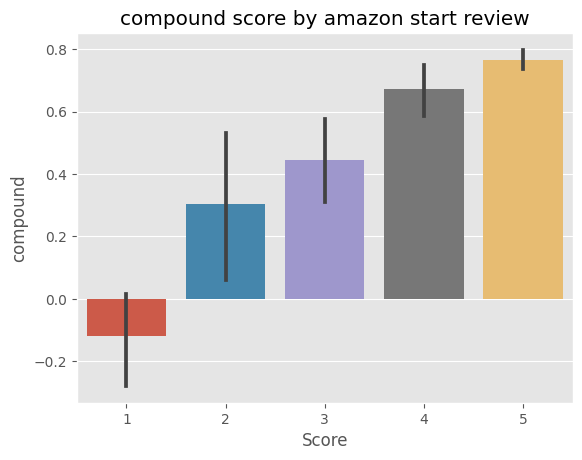

In [49]:
ax = sns.barplot(data=vaders, x='Score',y='compound')
ax.set_title('compound score by amazon start review')

As expected, the 4 and 5 star reviews have higher compound score than 1-2 stars, so we can safely say vaders are working

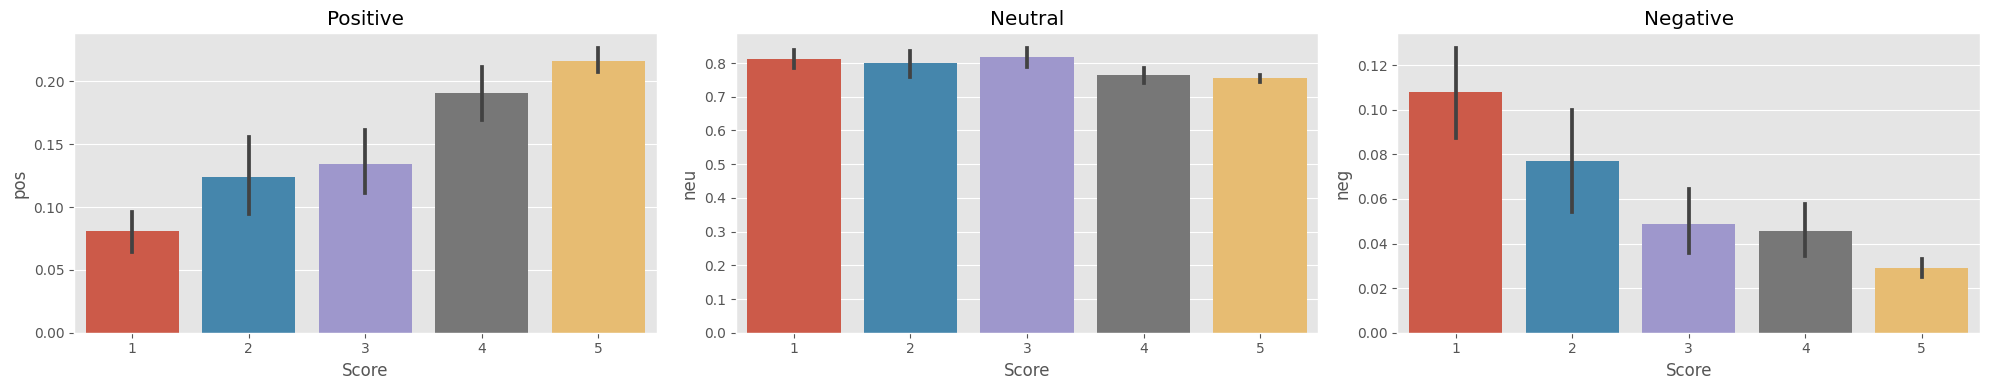

In [50]:
fig, axs= plt.subplots(1,3,figsize=(20,4))
sns.barplot(data=vaders ,x='Score',y='pos', ax=axs[0])
sns.barplot(data=vaders ,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vaders ,x='Score',y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()
plt.show()

## RoBERTa Pretrained Model
- Use a model trained on large corpus of data
- Transformer model accounts for the words but also the context related to other words.

In [52]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 60.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.3 MB/s eta 0:00:00


In [53]:
from transformers import AutoTokenizer,AutoModelForSeq2SeqLM
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [ ]:
# from huggingface_hub import notebook_login
# notebook_login()

In [ ]:
# import torch

In [ ]:
# device = 'cuda' if torch.cuda.is_available() else 'cpu'
# device

In [57]:
model_ckpt ='cardiffnlp/twitter-roberta-base-sentiment'
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)
model1 = AutoModelForSequenceClassification.from_pretrained(model_ckpt)

In [59]:
# model_name = 'google/pegasus-cnn_dailymail'
# tokenizer2= AutoTokenizer.from_pretrained(model_name)
# model2 = AutoModelForSeq2SeqLM.from_pretrained(model_name)

In [61]:
#vader results
print(example)
SIA.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [64]:
# roberta model
encoded_text = tokenizer(example, return_tensors='pt')

In [71]:
output = model1(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[ 3.1436, -0.7107, -2.6559]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [72]:
scores = output[0][0].detach().numpy()
scores = softmax(scores)

In [73]:
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687476, 'roberta_pos': 0.002957372}


In [74]:
SIA.polarity_scores(example)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [75]:
def polarity_scores_roberta(example):
  encoded_text = tokenizer(example, return_tensors='pt')
  output = model1(**encoded_text)
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2],
  }
  return scores_dict

In [104]:
res2={}

In [115]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Text']
        myid = row['Id']
        vader_result = SIA.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/600 [00:00<?, ?it/s]

Broke for id 83
Broke for id 187
Broke for id 529
Broke for id 540


In [112]:
# for i,rows in tqdm(df.iterrows(), total=len(df)):
#   try:
#     text= row['Text']
#     myid = row['Id']
#     vader_res = SIA.polarity_scores(text)
#     vader_res_renamed={}
#     for key,val in vader_res.items():
#       vader_res_renamed[f'vader_{key}']=val
#     roberta_res = polarity_scores_roberta(text)
#     both = {**vader_res_renamed , **roberta_res}
#     res2[myid] = both

#   except RuntimeError:
#     print(f'broke on id {myid}')

  0%|          | 0/600 [00:00<?, ?it/s]

In [117]:
res.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 2

In [118]:
results_df = pd.DataFrame(res).T

In [111]:
results_df.head()

,roberta_neg,roberta_neu,roberta_pos,vader_compound,vader_neg,vader_neu,vader_pos
600,0.001434,0.007693,0.990873,0.9842,0.051,0.693,0.257


In [119]:
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df= results_df.merge(df, how='left')

In [120]:
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [121]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 596 entries, 0 to 595
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      596 non-null    int64  
 1   vader_neg               596 non-null    float64
 2   vader_neu               596 non-null    float64
 3   vader_pos               596 non-null    float64
 4   vader_compound          596 non-null    float64
 5   roberta_neg             596 non-null    float64
 6   roberta_neu             596 non-null    float64
 7   roberta_pos             596 non-null    float64
 8   ProductId               596 non-null    object 
 9   UserId                  596 non-null    object 
 10  ProfileName             596 non-null    object 
 11  HelpfulnessNumerator    596 non-null    int64  
 12  HelpfulnessDenominator  596 non-null    int64  
 13  Score                   596 non-null    int64  
 14  Time                    596 non-null    in

## Comparing **scores**

In [122]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

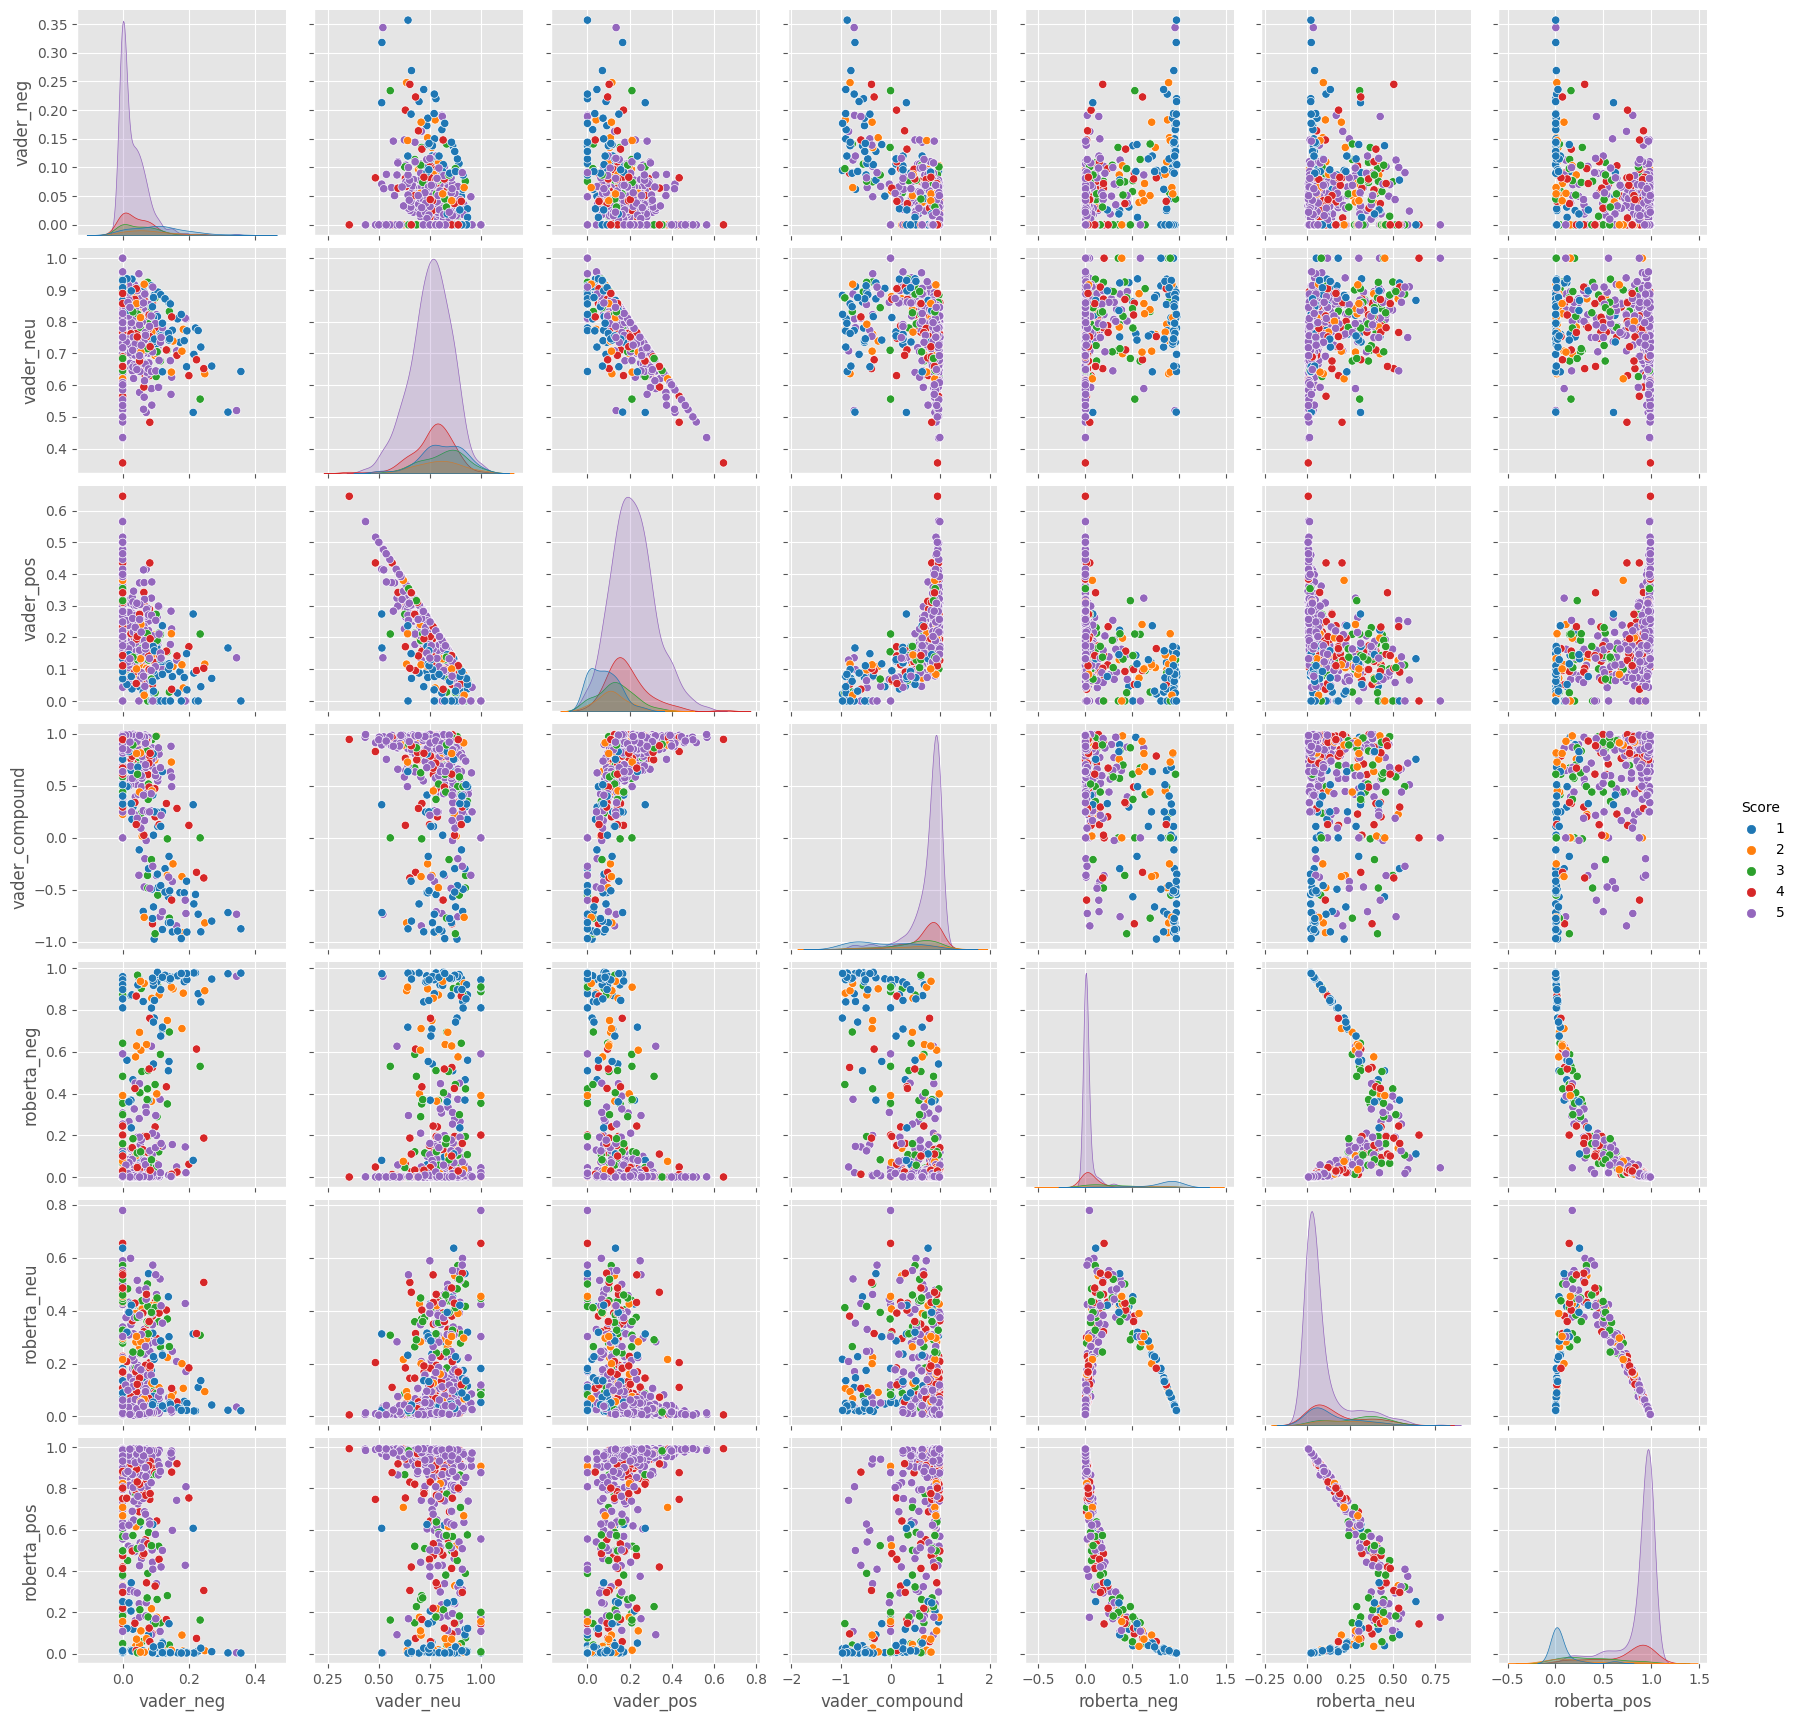

In [124]:
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue='Score',
             palette='tab10')
plt.show()

If we look at the correlations between roberta and vader, its not that helpful. But we can observe that the positive vs neutral in roBERTa, have pretty high 5 starred reviews compared to the vader

## Examples :

In [128]:
results_df.query('Score == 1').sort_values('roberta_pos', ascending=False)[['ProfileName','Text']].values[0]

array(['no name',
       'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'],
      dtype=object)

Here we can see that, roberta model gave it a positive one though it is a 1 start review, reason being, if we read the first part of the sentence, it feels like a positive review

In [129]:
results_df.query('Score == 1').sort_values('vader_pos', ascending=False)[['ProfileName','Text']].values[0]

array(['Hurricane Ridge "Chris"',
       'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'],
      dtype=object)

Here, we are dealing with sarcasm , hence vader kind of model doesnt take up on that

In [132]:
results_df.query('Score == 5').sort_values('roberta_neg', ascending=False)[['ProfileName','Text']].values[0]

array(['C. Salcido',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)

In [131]:
results_df.query('Score == 5').sort_values('vader_neg', ascending=False)[['ProfileName','Text']].values[0]

array(['C. Salcido',
       'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'],
      dtype=object)